**Purpose**

This notebook is for the exercises of the book "Reinforcement leanrning: an introdcution" by R. S. Sutton and A. G. Barto

# The Problem #

## Value of state update function ##

$$ V(s) \leftarrow V(s) + \alpha [V(s')-V(s)] $$

$ s \textrm{ : State before greedy move} $ <br />
$ s' \textrm{ : State after the move} $ <br />
$ \alpha \textrm{ : step-size parameter (learning rate)} $

## Action-Value estimation ##

### Action evaluation ###

**SAMPLE AVERAGE METHOD**

- True value of an action : $Q^*(a)$
- Estimated value at the $t$th play : $Q_t(a)$

*The true value of an action is the mean reward received when the action is selected.*

$$ Q_t(a) = \frac{r_1 + r_2 + ... + r_{k_a}}{k_a} $$

$ k_a \textrm{ : times action } a \textrm{ has been choosen before } t $ <br />
$ r_{k_a} \textrm{ : reward received at } k_a $ <br />

### Action selection ###

**$\varepsilon\textrm{-greedy}$ methods**

$\varepsilon$ is the probability to select non-greedy action

- Greedy Action : $Q_t(a^*) = max_aQ_t(a)$
- Non greedy Action : $random(a)$

### *10-armed testbed* ###

bandit : [-0.10346571 -0.02105868  0.86391787 -1.60985927 -0.69483334  1.63439155
  1.19672945  0.54650876  0.3485323   1.00711123]


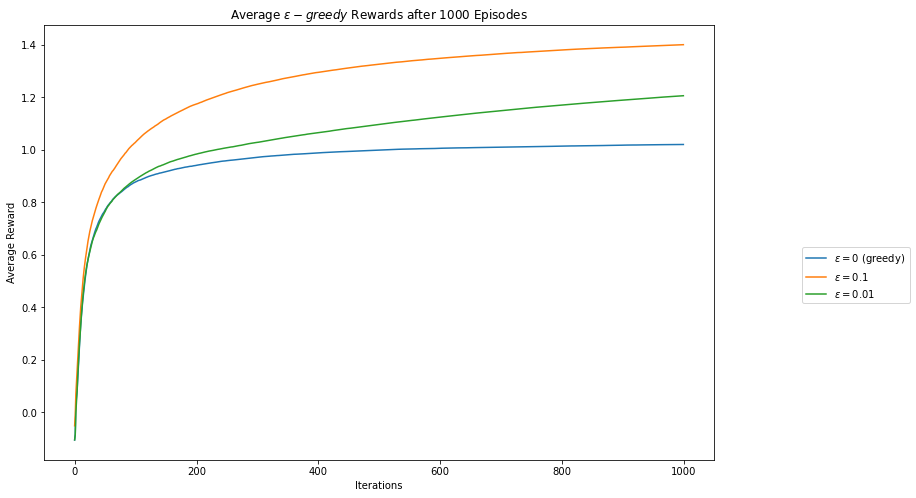

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(777)

# Set bandit machine with n arms
n = 10
bandit = np.random.normal(0,1,10)
print('bandit :', bandit)

# Set number of experiments
coins = 1000

# Set number of days of play
days = 1000

# Set epsilon greedy policies
eps_0 = 0
eps_1 = 0.1
eps_2 = 0.01

# Initialize the average rewards array for 3 different eps
mean_rewards_0 = np.zeros(coins)
mean_rewards_1 = np.zeros(coins)
mean_rewards_2 = np.zeros(coins)

# Every day we retry
for day in range(days):
    # Initialization 
    mean_reward_0 = 0
    mean_reward_1 = 0
    mean_reward_2 = 0
    t = 0
    rewards_0 = np.zeros(coins)
    rewards_1 = np.zeros(coins)
    rewards_2 = np.zeros(coins)
    Qta_0 = np.zeros(n) # Action values array
    Qta_1 = np.zeros(n)
    Qta_2 = np.zeros(n)
    # Initialize action count
    k_n_0 = np.zeros(n)
    k_n_1 = np.zeros(n)
    k_n_2 = np.zeros(n)
    # plays according to policy
    for play in range(coins):
        t += 1
        arm_choice_0 = np.argmax(Qta_0)
        arm_choice_1 = np.argmax(Qta_1) if eps_1 < np.random.rand() else np.random.choice(n)
        arm_choice_2 = np.argmax(Qta_2) if eps_2 < np.random.rand() else np.random.choice(n)
        k_n_0[arm_choice_0] += 1
        k_n_1[arm_choice_1] += 1
        k_n_2[arm_choice_2] += 1
        reward_0 = np.random.normal(bandit[arm_choice_0], 1)
        reward_1 = np.random.normal(bandit[arm_choice_1], 1)
        reward_2 = np.random.normal(bandit[arm_choice_2], 1)
        Qta_0[arm_choice_0] = Qta_0[arm_choice_0] + (reward_0 - Qta_0[arm_choice_0]) / k_n_0[arm_choice_0]
        Qta_1[arm_choice_1] = Qta_1[arm_choice_1] + (reward_1 - Qta_1[arm_choice_1]) / k_n_1[arm_choice_1]
        Qta_2[arm_choice_2] = Qta_2[arm_choice_2] + (reward_2 - Qta_2[arm_choice_2]) / k_n_2[arm_choice_2]
        mean_reward_0 = mean_reward_0 + (reward_0 - mean_reward_0) / t
        mean_reward_1 = mean_reward_1 + (reward_1 - mean_reward_1) / t
        mean_reward_2 = mean_reward_2 + (reward_2 - mean_reward_2) / t
        rewards_0[play] = mean_reward_0
        rewards_1[play] = mean_reward_1
        rewards_2[play] = mean_reward_2
    
    mean_rewards_0 = mean_rewards_0 + (rewards_0 - mean_rewards_0) / (day + 1)
    mean_rewards_1 = mean_rewards_1 + (rewards_1 - mean_rewards_1) / (day + 1)
    mean_rewards_2 = mean_rewards_2 + (rewards_2 - mean_rewards_2) / (day + 1)

plt.figure(figsize=(12,8))
plt.plot(mean_rewards_0, label="$\epsilon=0$ (greedy)")
plt.plot(mean_rewards_1, label="$\epsilon=0.1$")
plt.plot(mean_rewards_2, label="$\epsilon=0.01$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(days) 
    + " Episodes")
plt.show()